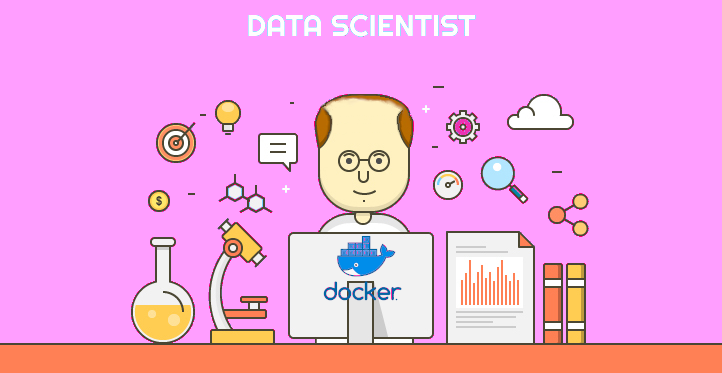

# Exploratory Data Analysis (EDA) 

Análise Exploratória de Dados desempenha um papel crítico na compreensão do quê? por que? e como? na declaração do problema. É o primeiro na ordem das operações que um Cientista de Dados executa ao receber uma nova fonte de dados e declaração de problema. Tratamos EDA como uma série de técnicas utilizadas de modo a entendermos os diversos aspectos dos dados.

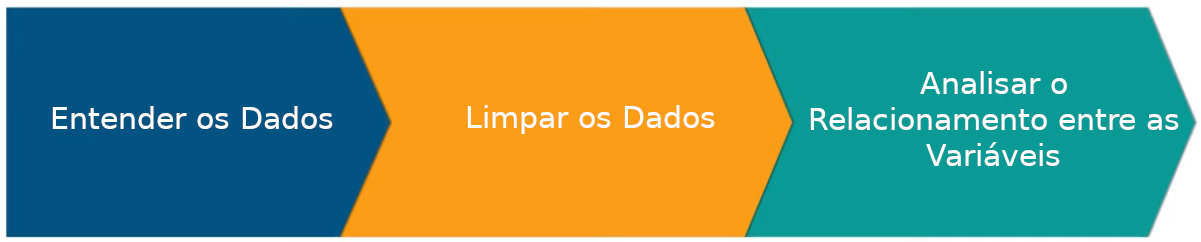

In [1]:
import pandas as pd # Excel
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../bases/StudentsPerformance.csv')

## 1. Entender os Dados

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
print("Tamanho: ", df.shape)
print("Nome das Colunas: ", df.columns)

Tamanho:  (1000, 8)
Nome das Colunas:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


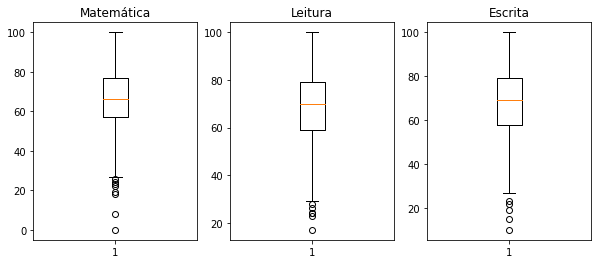

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
axes[0].boxplot(df['math score'])
axes[0].set_title("Matemática")
axes[1].boxplot(df['reading score'])
axes[1].set_title("Leitura")
axes[2].boxplot(df['writing score'])
axes[2].set_title("Escrita")
plt.show()

In [10]:
X = df.iloc[:, 5:8].values
print(X)

[[72 72 74]
 [69 90 88]
 [90 95 93]
 ...
 [59 71 65]
 [68 78 77]
 [77 86 86]]


In [11]:
pd.options.display.float_format = '{:.1f}'.format
xDF = pd.DataFrame(X)

In [12]:
z = xDF.describe()
z.head()

,0,1,2
count,1000.0,1000.0,1000.0
mean,66.1,69.2,68.1
std,15.2,14.6,15.2
min,0.0,17.0,10.0
25%,57.0,59.0,57.8


In [13]:
for t in z:
    iqr = z[t][6] - z[t][4]
    extMenor = z[t][4] - (iqr * 1.5)
    extMaior = z[t][6] + (iqr * 1.5)
    print('Na Col. %d devem estar abaixo de %.2f e acima de %.2f' % (t, extMenor, extMaior))

Na Col. 0 devem estar abaixo de 27.00 e acima de 107.00
Na Col. 1 devem estar abaixo de 29.00 e acima de 109.00
Na Col. 2 devem estar abaixo de 25.88 e acima de 110.88


In [17]:
matematica = X[:,0]
matOutliers = (X[:,0] < 27.00)
df[matOutliers]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


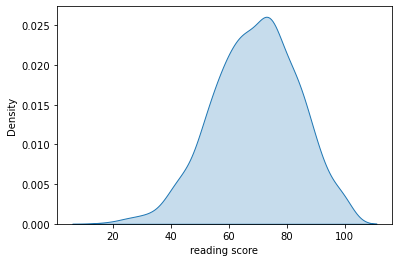

In [19]:
sns.kdeplot(df['math score'], shade=True)
plt.show()

In [20]:
print(df['gender'].dtype)
print(df['race/ethnicity'].dtype)
print(df['parental level of education'].dtype)
print(df['lunch'].dtype)
print(df['test preparation course'].dtype)
# Realizar uma troca para String
df['gender'] = df['gender'].astype(pd.StringDtype())
df['race/ethnicity'] = df['race/ethnicity'].astype(pd.StringDtype())
df['parental level of education'] = df['parental level of education'].astype(pd.StringDtype())
df['lunch'] = df['lunch'].astype(pd.StringDtype())
df['test preparation course'] = df['test preparation course'].astype(pd.StringDtype())
print(df['gender'].dtype)
print(df['race/ethnicity'].dtype)
print(df['parental level of education'].dtype)
print(df['lunch'].dtype)
print(df['test preparation course'].dtype)

object
object
object
object
object
string
string
string
string
string


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   string
 1   race/ethnicity               1000 non-null   string
 2   parental level of education  1000 non-null   string
 3   lunch                        1000 non-null   string
 4   test preparation course      1000 non-null   string
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), string(5)
memory usage: 62.6 KB


In [22]:
df.nunique() # Quantos de Cada

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [23]:
print("Gênero: ", df['gender'].unique())
print("Etinicidade: ", df['race/ethnicity'].unique())
print("Escolaridade dos Pais: ", df['parental level of education'].unique())
print("Refeição: ", df['lunch'].unique())
print("Realizou Preparatório: ", df['test preparation course'].unique())

Gênero:  <StringArray>
['female', 'male']
Length: 2, dtype: string
Etinicidade:  <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: string
Escolaridade dos Pais:  <StringArray>
[ "bachelor's degree",       'some college',    "master's degree",
 "associate's degree",        'high school',   'some high school']
Length: 6, dtype: string
Refeição:  <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: string
Realizou Preparatório:  <StringArray>
['none', 'completed']
Length: 2, dtype: string


## 2. Limpar os Dados

In [24]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# df = df.drop(['race/ethnicity', 'parental level of education'], axis=1)
# df.head()

Como essa base quase não possui inconsistências recomendo que vejamos o Notebok Limpeza.

## 3. Analisar o Relacionamento entre as Variáveis

In [25]:
df.corr()

,math score,reading score,writing score
math score,1.0,0.8,0.8
reading score,0.8,1.0,1.0
writing score,0.8,1.0,1.0


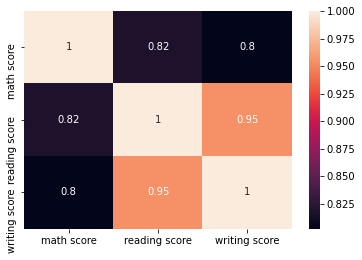

In [26]:
rel = df.corr()
sns.heatmap(rel, xticklabels=rel.columns, yticklabels=rel.columns, annot=True)
plt.show()

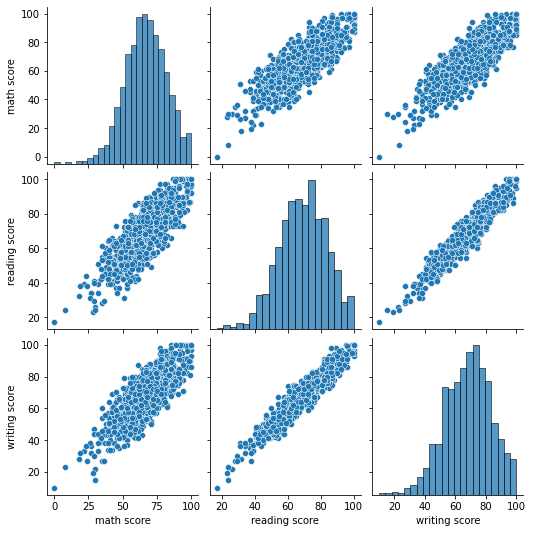

In [27]:
sns.pairplot(df)
plt.show()

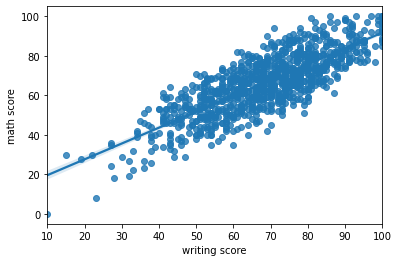

In [28]:
sns.regplot(x='writing score', y='math score', data=df)
plt.show()

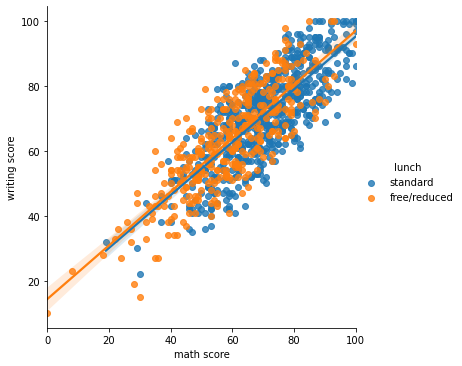

In [30]:
sns.lmplot(x='math score', y='writing score', hue='lunch', data=df)
plt.show()

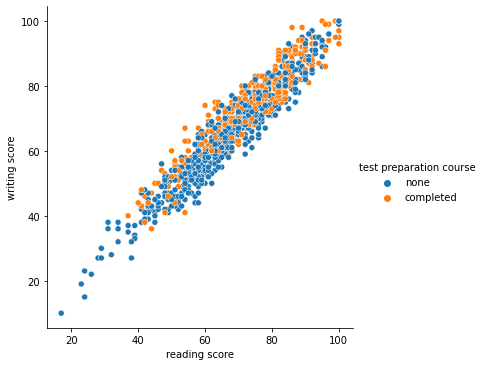

In [31]:
sns.relplot(x='reading score', y='writing score', hue='test preparation course', data=df)
plt.show()

In [ ]:
sns.scatterplot(x='writing score', y='reading score', hue='lunch', data=df)
plt.show()

Até a próxima \
Fernando Anselmo